# Import Necessary Files

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

# Load The California Housing Prices Dataset

In [4]:
california_housing = fetch_california_housing()

In [5]:
# create dataframe from data set
data = pd.DataFrame(data=np.c_[california_housing['data'],california_housing['target']],
                   columns=california_housing['feature_names'] + ['target'])

In [6]:
# extract the features from (X) and target (y)
X = data.drop('target', axis = 1)
y = data['target']
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Split the data into test data and test data

In [8]:
# split the data into traiining and testing sets (80% training , 20% testing)
X = data.drop('target', axis = 1)
y = data['target']
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42)

In [9]:
# create and train a linear regression model
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [10]:
# model evaluation
# make predictions on the testing data
y_pred = model.predict(X_test)

In [42]:
# evaluate the models's performance
mse = mean_squared_error (y_test , y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error (y_test , y_pred)

print(f'Mean Squared Error : {mse:.2f}')
print (f'R-Squared : {r2 :.2f}')
print ('Mean Absolute error' , mae)

Mean Squared Error : 0.56
R-Squared : 0.58
Mean Absolute error 0.5332001304956556


# visualization

C:\Users\ansar\AppData\Local\Temp\ipykernel_6928\815958375.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


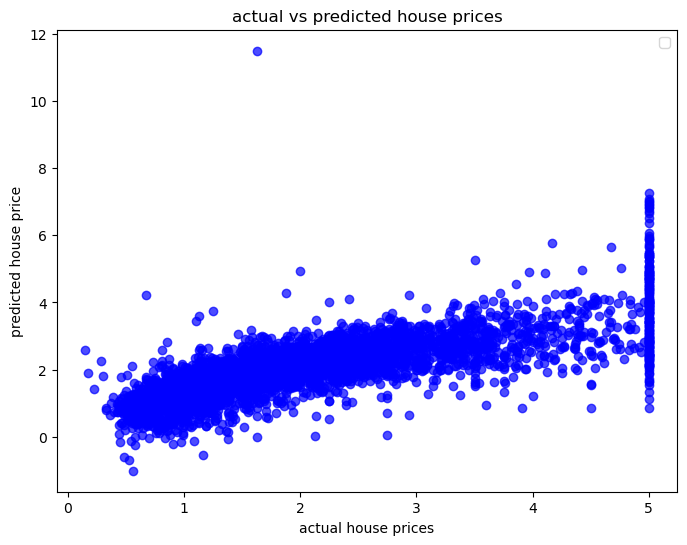

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred , color = 'blue', alpha = 0.7)
plt.xlabel("actual house prices")
plt.ylabel("predicted house price")
plt.title("actual vs predicted house prices")
plt.legend()
plt.show()